In [1]:
from influxdb import InfluxDBClient
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
plt.style.use('ggplot')
from pandas import read_csv

In [83]:
folderName = 's1t1rc1nc1t2largecomputeprimeappt2mediumqii'
host = '10.155.208.132'
port = 8086
username= 'root'
password = 'root'

In [84]:
client = InfluxDBClient(host, port,username , password, folderName+'_k8s')
clientK6 = InfluxDBClient(host, port, username, password, folderName+'_TestK6')

In [85]:
appnames  = ["primeapp"]

In [86]:
def getAllNodeNames():
    queryResult = client.query("SHOW TAG VALUES FROM uptime WITH KEY=nodename;")
    nodeNames_temp = list(queryResult.get_points())
    dfnodeNames = pd.DataFrame(nodeNames_temp)
    allNodeNames = dfnodeNames[:]["value"]
    return allNodeNames
def getNamespaceNames(node):
    nsQuery = client.query("SHOW TAG VALUES FROM uptime WITH KEY=namespace_name WHERE nodename = '"+node+"';")
    nsQuery_temp = list(nsQuery.get_points())
    dfnsNames = pd.DataFrame(nsQuery_temp)
    allnsNames = dfnsNames[:]["value"]
    return allnsNames
def getAllPodNames(node,ns_name):
    queryResult = client.query("SHOW TAG VALUES FROM uptime WITH KEY = pod_name WHERE namespace_name = '"+ns_name+"' AND nodename = '"+node+"';")
    podNames_temp = list(queryResult.get_points())
    dfpodNames = pd.DataFrame(podNames_temp)
    if dfpodNames.empty: 
        return dfpodNames
    else:
        allpodNames = dfpodNames[:]["value"]
        return allpodNames
def getCPUUtilizationNode(node):
    queryResult = client.query('SELECT * FROM "cpu/node_utilization" where nodename = \''+node+'\' AND type=\'node\';')
    dfcpuUtilization = pd.DataFrame(queryResult['cpu/node_utilization'])
    return dfcpuUtilization
def getCPUUtilizationPod(node,ns_name, pod_name):
    queryResult = client.query('SELECT * FROM "cpu/usage_rate" where nodename = \''+node+'\' AND pod_name = \''+pod_name+'\' AND namespace_name = \''+ns_name+'\'  AND type=\'pod\';')
    dfcpuUtilization = pd.DataFrame(queryResult['cpu/usage_rate'])
    return dfcpuUtilization
def getCPUUtilizationPodContainer(node,ns_name, pod_name):
    queryResult = client.query('SELECT * FROM "cpu/usage_rate" where nodename = \''+node+'\' AND pod_name = \''+pod_name+'\' AND namespace_name = \''+ns_name+'\' AND type=\'pod_container\';')
    dfcpuUtilization = pd.DataFrame(queryResult['cpu/usage_rate'])
    return dfcpuUtilization
def prepareCpuUtilization(node,ns_name, pod_name):
    cpuUtilization = getCPUUtilizationNode(node)
    podCpuUtilization = getCPUUtilizationPod(node,ns_name, pod_name)
    containercpuUtilization = getCPUUtilizationPodContainer(node,ns_name, pod_name)
    plt.plot(cpuUtilization.index, cpuUtilization['value'] *1000, 'r', label="node") # plotting t, a separately 
    plt.plot(podCpuUtilization.index, podCpuUtilization['value'], 'b', label="pod") # plotting t, b separately 
    plt.plot(containercpuUtilization.index, containercpuUtilization['value'], 'g', label="container") # plotting t, c separately
    plt.legend(loc='upper left')
    plt.show()
def getMemoryUtilizationNode(node):
    queryResult = client.query('SELECT * FROM "memory/node_utilization" where nodename = \''+node+'\' AND type=\'node\';')
    dfmemUtilization = pd.DataFrame(queryResult['memory/node_utilization'])
    return dfmemUtilization
def getMemoryUtilizationPod(node,ns_name, pod_name):
    queryResult = client.query('SELECT * FROM "memory/usage" where nodename = \''+node+'\' AND pod_name = \''+pod_name+'\' AND namespace_name = \''+ns_name+'\'  AND type=\'pod\';')
    dfmemUtilization = pd.DataFrame(queryResult['memory/usage'])
    return dfmemUtilization
def getMemoryUtilizationPodContainer(node,ns_name, pod_name):
    queryResult = client.query('SELECT * FROM "memory/usage" where nodename = \''+node+'\' AND pod_name = \''+pod_name+'\' AND namespace_name = \''+ns_name+'\' AND type=\'pod_container\';')
    dfmemUtilization = pd.DataFrame(queryResult['memory/usage'])
    return dfmemUtilization
def prepareMemoryUtilization(node,ns_name, pod_name):
    memoryUtilization = getMemoryUtilizationNode(node)
    podMemoryUtilization = getMemoryUtilizationPod(node,ns_name, pod_name)
    containerMemoryUtilization = getMemoryUtilizationPodContainer(node,ns_name, pod_name)
    plt.plot(memoryUtilization.index, memoryUtilization['value'], 'r', label="node") # plotting t, a separately 
    plt.plot(podMemoryUtilization.index, podMemoryUtilization['value'], 'b', label="pod") # plotting t, b separately 
    plt.plot(containerMemoryUtilization.index, containerMemoryUtilization['value'], 'g', label="container") # plotting t, c separately 
    plt.legend(loc='upper left')
    plt.show()
def getNetworkTxRatePod(node,ns_name, pod_name):
    queryResult = client.query('SELECT * FROM "network/tx_rate" where nodename = \''+node+'\' AND pod_name = \''+pod_name+'\' AND namespace_name = \''+ns_name+'\'  AND type=\'pod\';')
    dfmemUtilization = pd.DataFrame(queryResult['network/tx_rate'])
    return dfmemUtilization
def getNetworkTxPod(node,ns_name, pod_name):
    queryResult = client.query('SELECT * FROM "network/tx" where nodename = \''+node+'\' AND pod_name = \''+pod_name+'\' AND namespace_name = \''+ns_name+'\'  AND type=\'pod\';')
    dfmemUtilization = pd.DataFrame(queryResult['network/tx'])
    return dfmemUtilization
def getNetworkTxErrorsPod(node,ns_name, pod_name):
    queryResult = client.query('SELECT * FROM "network/tx_errors" where nodename = \''+node+'\' AND pod_name = \''+pod_name+'\' AND namespace_name = \''+ns_name+'\'  AND type=\'pod\';')
    dfmemUtilization = pd.DataFrame(queryResult['network/tx_errors'])
    return dfmemUtilization
def getNetworkTxErrorsRatePod(node,ns_name, pod_name):
    queryResult = client.query('SELECT * FROM "network/tx_errors_rate" where nodename = \''+node+'\' AND pod_name = \''+pod_name+'\' AND namespace_name = \''+ns_name+'\'  AND type=\'pod\';')
    dfmemUtilization = pd.DataFrame(queryResult['network/tx_errors_rate'])
    return dfmemUtilization
def prepareNetworkTxRateUtilization(node,ns_name, pod_name):
    podNetworTxRate = getNetworkTxRatePod(node,ns_name, pod_name)
    podNetworTx = getNetworkTxPod(node,ns_name, pod_name)
    podNetworkError = getNetworkTxErrorsPod(node,ns_name, pod_name)
    podNetworkErrorRate = getNetworkTxErrorsRatePod(node,ns_name, pod_name)
    plt.plot(podNetworTxRate.index, podNetworTxRate['value'], 'b') # plotting t, b separately 
    #plt.plot(podNetworTx.index, podNetworTx['value'], 'g') # plotting t, b separately 
    #plt.plot(podNetworkError.index, podNetworkError['value'], 'y') # plotting t, b separately 
    plt.plot(podNetworkErrorRate.index, podNetworkErrorRate['value'], 'r') # plotting t, b separately 
    plt.show()
def getNetworkRxRatePod(node,ns_name, pod_name):
    queryResult = client.query('SELECT * FROM "network/rx_rate" where nodename = \''+node+'\' AND pod_name = \''+pod_name+'\' AND namespace_name = \''+ns_name+'\'  AND type=\'pod\';')
    dfmemUtilization = pd.DataFrame(queryResult['network/rx_rate'])
    return dfmemUtilization
def getNetworkRxPod(node,ns_name, pod_name):
    queryResult = client.query('SELECT * FROM "network/rx" where nodename = \''+node+'\' AND pod_name = \''+pod_name+'\' AND namespace_name = \''+ns_name+'\'  AND type=\'pod\';')
    dfmemUtilization = pd.DataFrame(queryResult['network/rx'])
    return dfmemUtilization

def getNetworkRxErrorsPod(node,ns_name, pod_name):
    queryResult = client.query('SELECT * FROM "network/rx_errors" where nodename = \''+node+'\' AND pod_name = \''+pod_name+'\' AND namespace_name = \''+ns_name+'\'  AND type=\'pod\';')
    dfmemUtilization = pd.DataFrame(queryResult['network/rx_errors'])
    return dfmemUtilization
def getNetworkRxErrorsRatePod(node,ns_name, pod_name):
    queryResult = client.query('SELECT * FROM "network/rx_errors_rate" where nodename = \''+node+'\' AND pod_name = \''+pod_name+'\' AND namespace_name = \''+ns_name+'\'  AND type=\'pod\';')
    dfmemUtilization = pd.DataFrame(queryResult['network/rx_errors_rate'])
    return dfmemUtilization
def prepareNetworkRxRateUtilization(node,ns_name, pod_name):
    podNetworRxRate = getNetworkRxRatePod(node,ns_name, pod_name)
    podNetworRx = getNetworkRxPod(node,ns_name, pod_name)
    podNetworkError = getNetworkRxErrorsPod(node,ns_name, pod_name)
    podNetworkErrorRate = getNetworkRxErrorsRatePod(node,ns_name, pod_name)
    plt.plot(podNetworRxRate.index, podNetworRxRate['value'], 'b') # plotting t, b separately 
    #plt.plot(podNetworRx.index, podNetworRx['value'], 'g') # plotting t, b separately 
    #plt.plot(podNetworkError.index, podNetworkError['value'], 'y') # plotting t, b separately 
    plt.plot(podNetworkErrorRate.index, podNetworkErrorRate['value'], 'r') # plotting t, b separately 
    plt.show()
def getRelevantNodeName(ns_name):
    allNodeNames  = getAllNodeNames()
    #nsNames = getNamespaceNames(allNodeNames[0])
    for node in allNodeNames:
        allPodNamesNode = getAllPodNames (node, ns_name)
        if(not allPodNamesNode.empty):
            return node

In [87]:
def getNodeResourceUtilizationDf(nodeName):
    Result_node_CPU = client.query("SELECT value from \"cpu/node_utilization\" where nodename = '"+nodeName+"' AND type = 'node' ")
    Result_node_MEM = client.query("SELECT value from \"memory/node_utilization\" where nodename = '"+nodeName+"' AND type = 'node' ")
    Result_node_CPU_Cores = client.query("SELECT mean(\"value\") FROM \"cpu/node_capacity\" where nodename = '"+nodeName+"' AND type = 'node' GROUP BY time(1m)")
    Result_node_mem_node = client.query("SELECT mean(\"value\")FROM \"memory/node_capacity\" where nodename = '"+nodeName+"' AND type = 'node' GROUP BY time(1m)")
    
    cpu_points = pd.DataFrame(Result_node_CPU.get_points())
    cpu_points['time'] = pd.to_datetime(cpu_points['time'])
    cpu_points = cpu_points.set_index('time')
    cpu_points.columns = ['node_cpu_util']
    mem_points = pd.DataFrame(Result_node_MEM.get_points())
    mem_points['time'] = pd.to_datetime(mem_points['time'])
    mem_points = mem_points.set_index('time')
    mem_points.columns = ['node_mem_util']
    
    cores_points = pd.DataFrame(Result_node_CPU_Cores.get_points())
    cores_points['time'] = pd.to_datetime(cores_points['time'])
    cores_points = cores_points.set_index('time')
    cores_points.columns = ['node_cores']
    
    mem_node_points = pd.DataFrame(Result_node_mem_node.get_points())
    mem_node_points['time'] = pd.to_datetime(mem_node_points['time'])
    mem_node_points = mem_node_points.set_index('time')
    mem_node_points.columns = ['node_mem']
    
    df_node =pd.concat([cpu_points, mem_points,cores_points,mem_node_points], axis=1)
    return df_node

In [88]:
def getPodResourceUtilizationDf(node, ns_name, pod_name):
    Result_Pod_CPU_usage = client.query('SELECT value FROM "cpu/usage_rate" where nodename = \''+node+'\' AND pod_name = \''+pod_name+'\' AND namespace_name = \''+ns_name+'\'  AND type=\'pod\';')
    Result_Pod_MEM_usage = client.query('SELECT value from \"memory/usage\" where nodename = \''+node+'\' AND pod_name = \''+pod_name+'\' AND namespace_name = \''+ns_name+'\'  AND type=\'pod\';')
    
    Result_Pod_CPU_limit = client.query('SELECT mean(\"value\") FROM "cpu/limit" where nodename = \''+node+'\' AND pod_name = \''+pod_name+'\' AND namespace_name = \''+ns_name+'\'  AND type=\'pod\' group by time(1m);')
    Result_Pod_MEM_limit = client.query('SELECT mean(\"value\") from \"memory/limit\" where nodename = \''+node+'\' AND pod_name = \''+pod_name+'\' AND namespace_name = \''+ns_name+'\'  AND type=\'pod\' group by time(1m);')
    
    Result_Pod_CPU_requests = client.query('SELECT mean(\"value\") FROM "cpu/request" where nodename = \''+node+'\' AND pod_name = \''+pod_name+'\' AND namespace_name = \''+ns_name+'\'  AND type=\'pod\' group by time(1m);')
    Result_Pod_MEM_requests = client.query('SELECT mean(\"value\") from \"memory/request\" where nodename = \''+node+'\' AND pod_name = \''+pod_name+'\' AND namespace_name = \''+ns_name+'\'  AND type=\'pod\' group by time(1m);')
    
    
    cpu_points_usage = pd.DataFrame(Result_Pod_CPU_usage.get_points())
    cpu_points_usage['time'] = pd.to_datetime(cpu_points_usage['time'])
    cpu_points_usage = cpu_points_usage.set_index('time')
    cpu_points_usage.columns = ['pod_cpu_usage']
    
    
    mem_points_usage = pd.DataFrame(Result_Pod_MEM_usage.get_points())
    mem_points_usage['time'] = pd.to_datetime(mem_points_usage['time'])
    mem_points_usage = mem_points_usage.set_index('time')
    mem_points_usage.columns = ['pod_mem_usage']
    
     
    cpu_points_limits = pd.DataFrame(Result_Pod_CPU_limit.get_points())
    cpu_points_limits['time'] = pd.to_datetime(cpu_points_limits['time'])
    cpu_points_limits = cpu_points_limits.set_index('time')
    cpu_points_limits.columns = ['pod_cpu_limit']
    
    
    mem_points_limits = pd.DataFrame(Result_Pod_MEM_limit.get_points())
    mem_points_limits['time'] = pd.to_datetime(mem_points_limits['time'])
    mem_points_limits = mem_points_limits.set_index('time')
    mem_points_limits.columns = ['pod_mem_limit']
    
     
    cpu_points_request = pd.DataFrame(Result_Pod_CPU_requests.get_points())
    cpu_points_request['time'] = pd.to_datetime(cpu_points_request['time'])
    cpu_points_request = cpu_points_request.set_index('time')
    cpu_points_request.columns = ['pod_cpu_request']
    
    
    mem_points_request = pd.DataFrame(Result_Pod_MEM_requests.get_points())
    mem_points_request['time'] = pd.to_datetime(mem_points_request['time'])
    mem_points_request = mem_points_request.set_index('time')
    mem_points_request.columns = ['pod_mem_request']
       
    df_pod =pd.concat([cpu_points_usage, mem_points_usage,cpu_points_limits,mem_points_limits,cpu_points_request,mem_points_request ], axis=1)
    
    return df_pod

In [89]:
def getRequestsDf():
    queryResult = clientK6.query('SELECT sum("value") FROM "vus" group by time(1m);')
    vus = pd.DataFrame(queryResult['vus'])
    vus.columns = ['vus','time']
    vus = vus.set_index('time')


    queryResultReqs = clientK6.query('SELECT sum("value") FROM "http_reqs" group by time(1m);')
    reqs = pd.DataFrame(queryResultReqs['http_reqs'])
    reqs.columns = ['requests','time']
    reqs = reqs.set_index('time')
    queryResultReqsDuration95 = clientK6.query('SELECT percentile("value", 95) FROM "http_req_duration" group by time(1m) ;')
    reqs_duration95 = pd.DataFrame(queryResultReqsDuration95['http_req_duration'])
    reqs_duration95.columns = [ 'requests_duration_percentile_95','time']
    reqs_duration95 = reqs_duration95.set_index('time')
    queryResultReqsDuration90 = clientK6.query('SELECT percentile("value", 90) FROM "http_req_duration" group by time(1m) ;')
    reqs_duration90 = pd.DataFrame(queryResultReqsDuration90['http_req_duration'])
    reqs_duration90.columns = ['requests_duration_percentile_90','time']
    reqs_duration90 = reqs_duration90.set_index('time')

    queryResultMaxDuration = clientK6.query('SELECT max("value") FROM "http_req_duration" group by time(1m);')
    reqs_duration_max = pd.DataFrame(queryResultMaxDuration['http_req_duration'])
    reqs_duration_max.columns = ['requests_duration_max','time']
    reqs_duration_max = reqs_duration_max.set_index('time')

    queryResultMinDuration = clientK6.query('SELECT min("value") FROM "http_req_duration" group by time(1m);')
    reqs_duration_min = pd.DataFrame(queryResultMinDuration['http_req_duration'])
    reqs_duration_min.columns = ['requests_duration_min','time']
    reqs_duration_min = reqs_duration_min.set_index('time')

    queryResultMeanDuration = clientK6.query('SELECT mean("value") FROM "http_req_duration" group by time(1m);')
    reqs_duration_mean = pd.DataFrame(queryResultMeanDuration['http_req_duration'])
    reqs_duration_mean.columns = ['requests_duration_mean','time']
    reqs_duration_mean = reqs_duration_mean.set_index('time')

    queryResultMedianDuration = clientK6.query('SELECT median("value") FROM "http_req_duration" group by time(1m);')
    reqs_duration_median = pd.DataFrame(queryResultMedianDuration['http_req_duration'])
    reqs_duration_median.columns = ['requests_duration_median','time']
    reqs_duration_median = reqs_duration_median.set_index('time')

    finalDF = pd.merge(vus, reqs, left_index=True, right_index=True)
    finalDF = pd.merge(finalDF, reqs_duration95, left_index=True, right_index=True)
    finalDF = pd.merge(finalDF, reqs_duration90, left_index=True, right_index=True)
    finalDF = pd.merge(finalDF,reqs_duration_max, left_index=True, right_index=True)
    finalDF = pd.merge(finalDF,reqs_duration_min, left_index=True, right_index=True)
    finalDF = pd.merge(finalDF,reqs_duration_mean, left_index=True, right_index=True)
    finalDF = pd.merge(finalDF,reqs_duration_median, left_index=True, right_index=True)
    finalDF.index = pd.to_datetime(finalDF.index)

    return finalDF

In [90]:
def getPodsNodesRequestsDf():
    default_ns_name =  "default"
    relevantNodeName = getRelevantNodeName(default_ns_name)
    print(relevantNodeName)
    podNames = getAllPodNames(relevantNodeName, default_ns_name)
    df_node = getNodeResourceUtilizationDf(relevantNodeName)
    df_pods_node = []
    for podName in podNames: 
        df_pod = getPodResourceUtilizationDf(relevantNodeName, default_ns_name, podName)
        finalDF = pd.merge(df_node,df_pod, left_index=True, right_index=True)
        requestsDF = getRequestsDf()
        finalDF = pd.merge(finalDF,requestsDF, left_index=True, right_index=True)
        finalDF['pod_cpu_usage'] = finalDF['pod_cpu_usage']/(finalDF['pod_cpu_limit'])
        finalDF['pod_cpu_limit'] = finalDF['pod_cpu_limit']/(finalDF['pod_cpu_limit'])
        finalDF['pod_cpu_request'] = finalDF['pod_cpu_request']/(finalDF['pod_cpu_limit'])
 
        finalDF['pod_mem_usage'] = finalDF['pod_mem_usage']/(finalDF['pod_mem_limit'])
        finalDF['pod_mem_limit'] = finalDF['pod_mem_limit']/(finalDF['pod_mem_limit'])
        finalDF['pod_mem_request'] = finalDF['pod_mem_request']/(finalDF['pod_mem_limit'])
        
        finalDF['node_cores'] = finalDF['node_cores']/1000
        finalDF['node_mem'] = finalDF['node_mem']/(1073741824)
        
        finalDF = finalDF.fillna(0)
        finalDF = finalDF[(finalDF.T != 0).any()]
        df_pods_node.append(finalDF)
    return df_pods_node

In [91]:
df_pods_node = getPodsNodesRequestsDf()


None


TypeError: Can't convert 'NoneType' object to str implicitly

In [82]:
df_pods_node[0].head()


,node_cpu_util,node_mem_util,node_cores,node_mem,pod_cpu_usage,pod_mem_usage,pod_cpu_limit,pod_mem_limit,pod_cpu_request,pod_mem_request,vus,requests,requests_duration_percentile_95,requests_duration_percentile_90,requests_duration_max,requests_duration_min,requests_duration_mean,requests_duration_median
time,,,,,,,,,,,,,,,,,,
2018-08-18 02:14:00,0.0175,0.338449,2.0,7.799198,0.000,0.007512,1.0,1.0,1000.0,2.097152e+09,5.0,6.0,27.994542,27.389966,27.994542,15.014606,20.891946,19.657479
2018-08-18 02:15:00,0.0165,0.338306,2.0,7.799198,0.000,0.007572,1.0,1.0,1000.0,2.097152e+09,56.0,54.0,23.460334,23.319414,49.423175,13.724173,17.188255,14.886484
2018-08-18 02:16:00,0.0235,0.340176,2.0,7.799198,0.014,0.016465,1.0,1.0,1000.0,2.097152e+09,245.0,250.0,23.110434,22.732485,66.069055,13.385652,17.065942,14.162966
2018-08-18 02:17:00,0.0465,0.340003,2.0,7.799198,0.057,0.024922,1.0,1.0,1000.0,2.097152e+09,366.0,361.0,22.748646,22.501744,62.458827,13.307366,16.078574,14.091559
2018-08-18 02:18:00,0.0600,0.341515,2.0,7.799198,0.073,0.026346,1.0,1.0,1000.0,2.097152e+09,490.0,480.0,22.648907,22.218279,28.425279,12.990794,15.515236,13.775056


In [12]:
df_pods_node[0] = df_pods_node[0].reset_index(drop=True)


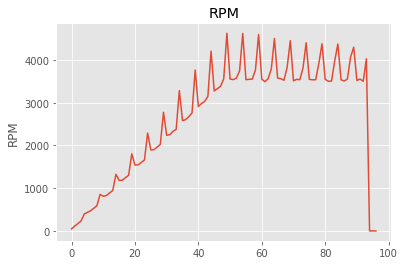

In [13]:
plt.plot(df_pods_node[0]['requests'])
plt.title("RPM")
plt.ylabel("RPM")
plt.grid(True)
plt.show()

# Node Utilization (CPU and memory)

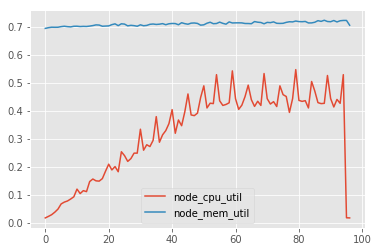

In [14]:
plt.figure()
plt.plot(df_pods_node[0]['node_cpu_util'], label='node_cpu_util')
plt.plot(df_pods_node[0]['node_mem_util'], label='node_mem_util')
plt.legend()
plt.show()

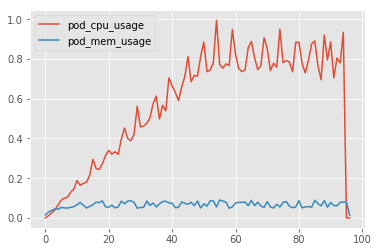

In [16]:
plt.figure()
plt.plot(df_pods_node[0]['pod_cpu_usage'], label='pod_cpu_usage')
plt.plot(df_pods_node[0]['pod_mem_usage'], label='pod_mem_usage')
plt.legend()
plt.show()

In [17]:
df_pods_node[0].fillna(0)
df_pods_node[0].corr()

,node_cpu_util,node_mem_util,node_cores,node_mem,pod_cpu_usage,pod_mem_usage,pod_cpu_limit,pod_mem_limit,pod_cpu_request,pod_mem_request,vus,requests,requests_duration_percentile_95,requests_duration_percentile_90,requests_duration_max,requests_duration_min,requests_duration_mean,requests_duration_median
node_cpu_util,1.000000,0.769254,NaN,NaN,0.986160,0.349985,NaN,NaN,NaN,NaN,0.865991,0.919173,0.738187,0.728460,0.739109,0.215224,0.717530,0.715969
node_mem_util,0.769254,1.000000,NaN,NaN,0.769658,0.378766,NaN,NaN,NaN,NaN,0.773670,0.681589,0.733472,0.735762,0.746754,0.287223,0.735368,0.735926
node_cores,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
node_mem,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pod_cpu_usage,0.986160,0.769658,NaN,NaN,1.000000,0.379345,NaN,NaN,NaN,NaN,0.868082,0.923313,0.739916,0.731091,0.739827,0.236290,0.720008,0.718182
pod_mem_usage,0.349985,0.378766,NaN,NaN,0.379345,1.000000,NaN,NaN,NaN,NaN,0.222435,0.304533,0.147974,0.142221,0.152019,0.064289,0.139801,0.140775
pod_cpu_limit,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pod_mem_limit,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pod_cpu_request,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pod_mem_request,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
dftemp_cpu = df_pods_node[0][['requests','node_cores','node_mem', 'node_cpu_util', 'pod_cpu_usage','pod_cpu_limit','pod_cpu_request','pod_mem_limit','pod_mem_request',  'requests_duration_mean', 'requests_duration_percentile_95']]
dftemp_mem = df_pods_node[0][['requests', 'node_cores','node_mem', 'node_mem_util','pod_cpu_limit','pod_cpu_request','pod_mem_usage','pod_mem_limit','pod_mem_request', 'requests_duration_mean', 'requests_duration_percentile_95']]


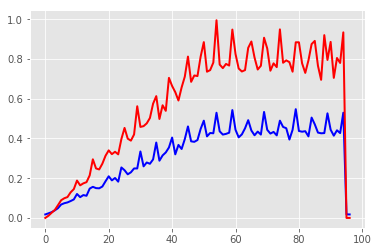

In [19]:
plt.plot( dftemp_cpu['node_cpu_util'], color='blue', linewidth=2)
plt.plot( dftemp_cpu['pod_cpu_usage'], color='red', linewidth=2)

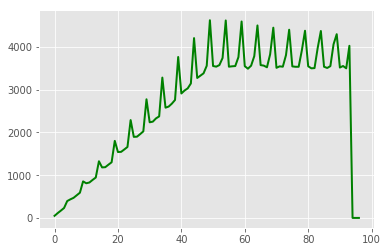

In [20]:
plt.plot( dftemp_cpu['requests'], color='green', linewidth=2)

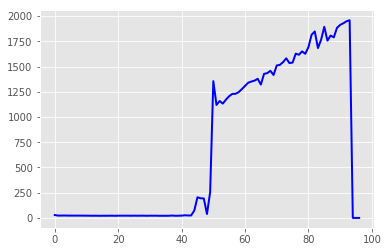

In [21]:
plt.plot(dftemp_cpu['requests_duration_percentile_95'], color='blue', linewidth=2)

In [22]:
import seaborn as sb

# Linear Regression

In [23]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale

In [24]:
# Use only one feature
df_X = dftemp_cpu[['requests']].values
df_Y = dftemp_cpu[['node_cpu_util']].values

In [25]:
from numpy import *
from scipy.interpolate import *

In [26]:
df_X = df_X.flatten()

In [27]:
df_Y = df_Y.flatten()

In [28]:
p1=polyfit(df_X, df_Y, 1)

In [29]:
p2=polyfit(df_X, df_Y, 2)
p3=polyfit(df_X, df_Y, 3)


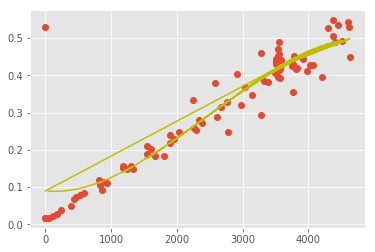

In [30]:
plt.plot(df_X, df_Y,'o')
#plt.plot(df_X, polyval(p1,df_X), 'b-')
#plt.plot(df_X, polyval(p2,df_X), 'g-')
plt.plot(df_X, polyval(p3,df_X), 'y-')

In [31]:
p3

array([ -7.79154630e-12,   5.83460047e-08,  -1.49919931e-05,
         8.96279414e-02])

In [32]:
# Use only one feature
df_X = dftemp_cpu[['requests', 'pod_cpu_limit']].values
df_Y = dftemp_cpu[['pod_cpu_usage']].values

In [43]:
X_train, X_test, y_train, y_test = train_test_split(df_X, df_Y, test_size=0.33, random_state=42)


In [44]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
# Create linear regression object
model = linear_model.LinearRegression()
#model = Pipeline([('poly', PolynomialFeatures(degree=2)),
#                  ('linear', LinearRegression(fit_intercept=False))])
#regr = linear_model.Ridge (alpha = .01)
#regr = linear_model.Lasso(alpha = 0.1)
#regr = linear_model.LassoLars(alpha=.1)
#regr = make_pipeline(PolynomialFeatures(2), Ridge())

# Train the model using the training sets
model.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = model.predict(X_test)

# The coefficients
print('Coefficients: \n', model.coef_)
print('intercept: \n', model.intercept_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))

#print ('Train score %.2f', regr.score(X_train, y_train) )
#print ('Test score %.2f', regr.score(X_test, y_test) )
#print ('Pred score %.2f', regr.score(X_test, y_pred) )

Coefficients: 
 [[ 0.00019306  0.        ]]
intercept: 
 [ 0.06492661]
Mean squared error: 0.01
Variance score: 0.93


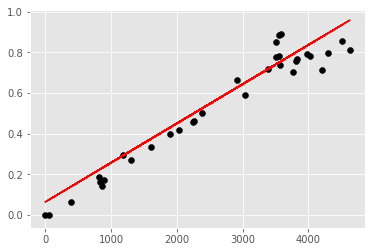

In [45]:
# Plot outputs
plt.scatter(X_test[:,0], y_test,  color='black')
#plt.plot(X_test[:,0], y_pred, color='blue')
plt.plot(X_test[:,0],y_pred,'-r')

plt.show()

In [49]:
model.predict([[4850, 1]])

array([[ 1.00124505]])

In [334]:
#pd.DataFrame(list(zip(y_pred,y_test)), columns = ['predict', 'test'])

# dataset_pod_hello_world

In [335]:
dataset_pod_hello_world.index = pd.to_datetime(dataset_pod_hello_world.index)
merged.index = pd.to_datetime(merged.index)

NameError: name 'dataset_pod_hello_world' is not defined

In [336]:
newmergedhello = dataset_pod_hello_world.reindex(merged.index, method='nearest')
finalDFhello = pd.merge(newmergedhello, merged, left_index=True, right_index=True)
finalDFhello.to_csv('final_hello.csv')


NameError: name 'dataset_pod_hello_world' is not defined

In [2401]:
dfhello = read_csv('final_hello.csv',index_col=0)
dfhello = dfhello.fillna(0)
dfhello = dfhello.sort_values(by=['aggregate.rps.mean'])
dfhello  = dfhello.reset_index()

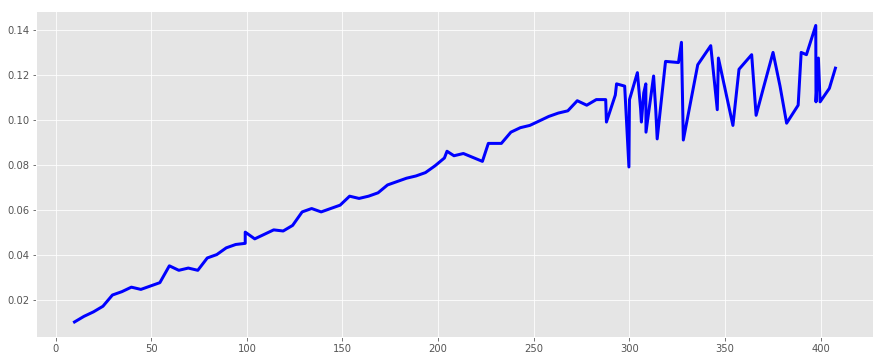

In [2402]:
dfhello = dfhello[['aggregate.rps.mean', 'cpu', 'aggregate.scenarioDuration.median']]
plt.plot(dfhello['aggregate.rps.mean'], dfhello['cpu'], color='blue', linewidth=3)

In [2409]:
def linear(dft):
    # Use only one feature
    df_X = dft[['aggregate.rps.mean']].values
    df_Y = dft[['cpu']].values
    X_train, X_test, y_train, y_test = train_test_split(df_X, df_Y, test_size=0.33, random_state=42)
    # Create linear regression object
    regr = linear_model.LinearRegression(normalize=True)
    #regr = linear_model.Ridge (alpha = .5)
    #regr = linear_model.Lasso(alpha = 0.1)
    #regr = linear_model.LassoLars(alpha=.1)
    #regr = make_pipeline(PolynomialFeatures(3), Ridge())

    # Train the model using the training sets
    regr.fit(X_train, y_train)

    # Make predictions using the testing set
    y_pred = regr.predict(X_test)

    # The coefficients
    print('Coefficients: \n', regr.coef_)
    print('intercept: \n', regr.intercept_)
    # The mean squared error
    print("Mean squared error: %.2f"
          % mean_squared_error(y_test, y_pred))
    # Explained variance score: 1 is perfect prediction
    print('Variance score: %.2f' % r2_score(y_test, y_pred))
    print ('Train score %.2f', regr.score(X_train, y_train) )
    print ('Test score %.2f', regr.score(X_test, y_test) )
    print ('Pred score %.2f', regr.score(X_test, y_pred) )
    # Plot outputs
    plt.scatter(X_test, y_test,  color='black')
    plt.plot(X_test, y_pred, color='blue')
    plt.show()


Coefficients: 
 [[ 0.00028514]]
intercept: 
 [ 0.01866948]
Mean squared error: 0.00
Variance score: 0.91
Train score %.2f 0.911538078085
Test score %.2f 0.908181249555
Pred score %.2f 1.0


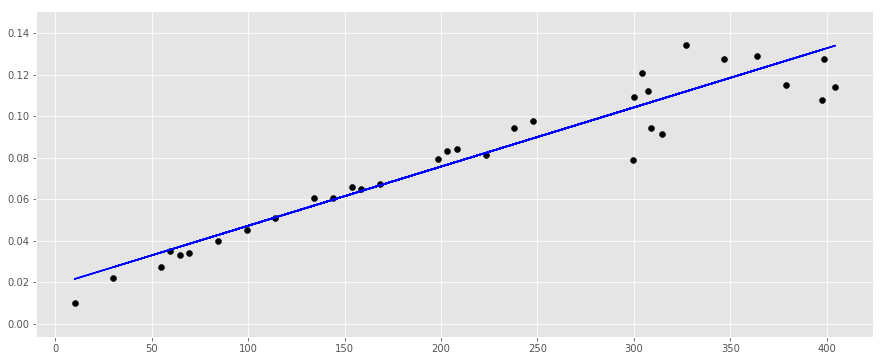

In [2410]:
linear(dfhello)

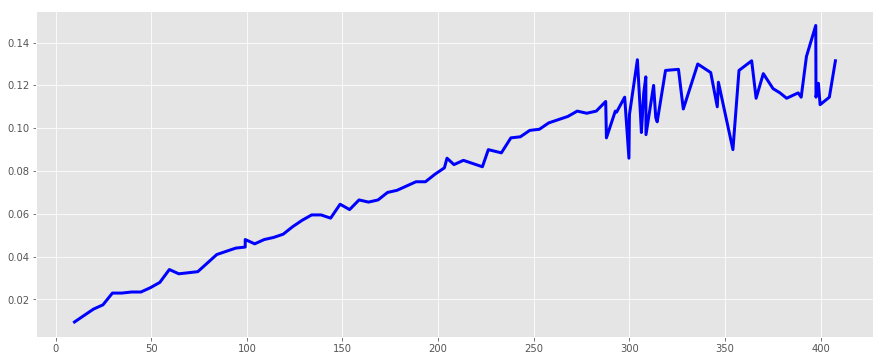

In [2386]:
dataset_pod_pdescp.index = pd.to_datetime(dataset_pod_pdescp.index)
merged.index = pd.to_datetime(merged.index)
newmergedpdescp = dataset_pod_pdescp.reindex(merged.index, method='nearest')
finalDFpdescp = pd.merge(newmergedpdescp, merged, left_index=True, right_index=True)
finalDFpdescp.to_csv('final_pdescp.csv')
dfpdescp = read_csv('final_pdescp.csv',index_col=0)
dfpdescp = dfpdescp.fillna(0)
dfpdescp = dfpdescp.sort_values(by=['aggregate.rps.mean'])
dfpdescp  = dfpdescp.reset_index()
dfpdescp = dfpdescp[['aggregate.rps.mean', 'cpu']]
plt.plot(dfpdescp['aggregate.rps.mean'], dfpdescp['cpu'], color='blue', linewidth=3)

Coefficients: 
 [[ 0.00029658]]
intercept: 
 [ 0.01676364]
Mean squared error: 0.00
Variance score: 0.93
Train score %.2f 0.933064000419
Test score %.2f 0.926191822942
Pred score %.2f 1.0


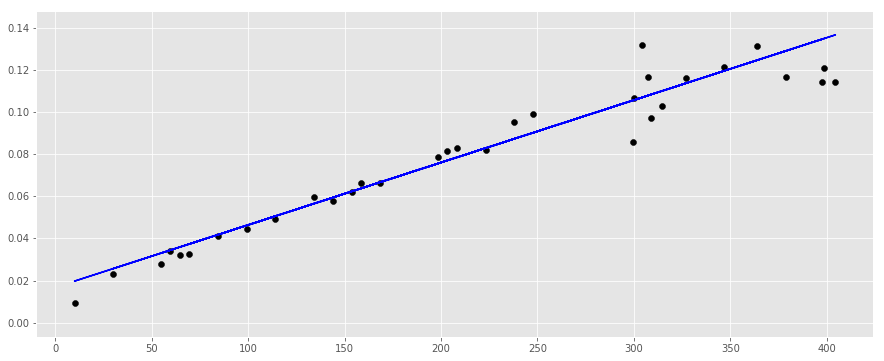

In [2387]:
linear(dfpdescp)


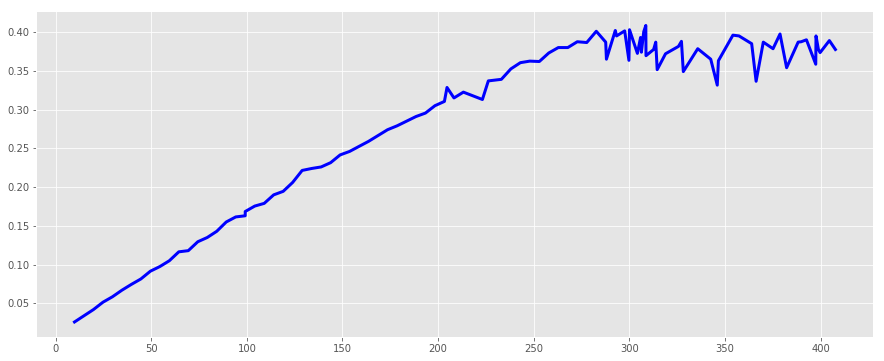

In [2388]:
dataset_pod_server.index = pd.to_datetime(dataset_pod_server.index)
merged.index = pd.to_datetime(merged.index)
newmergedserver = dataset_pod_server.reindex(merged.index, method='nearest')
finalDFserver = pd.merge(newmergedserver, merged, left_index=True, right_index=True)
finalDFserver.to_csv('final_server.csv')
dfpserver = read_csv('final_server.csv',index_col=0)
dfpserver = dfpserver.fillna(0)
dfpserver = dfpserver.sort_values(by=['aggregate.rps.mean'])
dfpserver  = dfpserver.reset_index()
dfpserver = dfpserver[['aggregate.rps.mean', 'cpu']]
plt.plot(dfpserver['aggregate.rps.mean'], dfpserver['cpu'], color='blue', linewidth=3)

Coefficients: 
 [[ 0.00089099]]
intercept: 
 [ 0.08862049]
Mean squared error: 0.00
Variance score: 0.90
Train score %.2f 0.85043997473
Test score %.2f 0.897025088355
Pred score %.2f 1.0


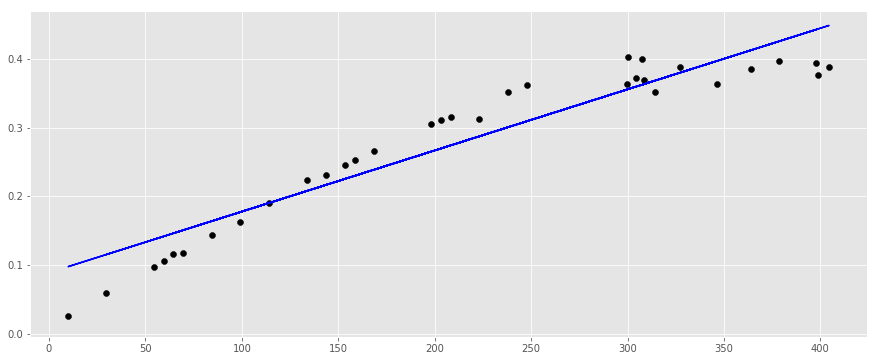

In [2389]:
linear(dfpserver)